In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans.kmeans import KMeans

In [2]:
data_size, dims, num_clusters = 1000, 2, 3
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

k_means=KMeans(n_clusters=num_clusters,distance='cosine', device=device)
np.random.seed(123)

In [3]:

x = np.random.randn(data_size, dims)/6
x = torch.from_numpy(x)

In [4]:
cluster_ids_x, cluster_centers = k_means.fit_predict(X=x)

In [5]:
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1,
        2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2,
        0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1,
        1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2,
        0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0,
        2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0,
        0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2,
        1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0,
        0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1,
        2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2,
        0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0,

In [6]:
y = np.random.randn(5, dims)/6
y = torch.from_numpy(y)

In [7]:
model=k_means.fit(X=x)
cluster_ids_x=model.choice_cluster
cluster_centers=model.cluster_centers
# k_means.fit(X=x)
cluster_ids_y = k_means.predict(y)

In [8]:
print(cluster_ids_y)


tensor([0, 0, 2, 0, 0])


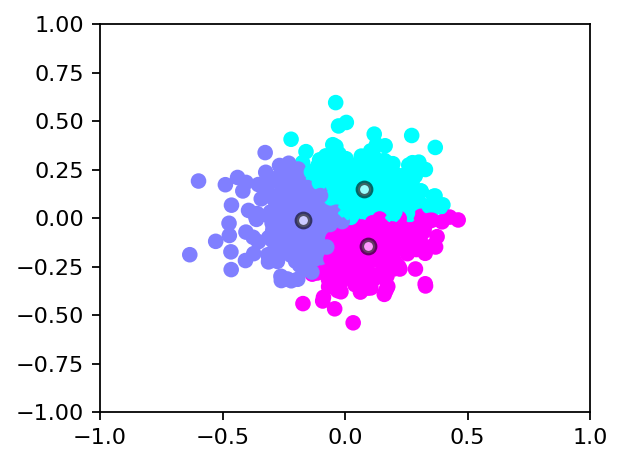

In [9]:
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
plt.axis([-1, 1, -1, 1])
plt.tight_layout()
plt.show()